In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import pickle
import json

In [2]:
# import os

# ROOT = os.getcwd()  # should be project_root
# path = os.path.join(ROOT, "results_B-V_tradeoffs", method, folder, "config.json")

# print(path)
# print(os.path.exists(path))


In [3]:
save_dir1 = r"/root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/uni-TvN9-pure_m=400_n=10_σ=0.5_d=10_top-1_07-17-171516" #TvN9-top1
save_dir2 = r"/root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/uni-TvN9-pure_m=400_n=10_σ=0.5_d=10_top-5_07-17-172543" #TvN9-top5
save_dir3 = r"/root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/uni-TvN9-reverse-pure_m=400_n=10_σ=0.5_d=10_top-1_07-17-173141" #TvN9-R-top1
save_dir4 = r"/root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/uni-TvN9-reverse-pure_m=400_n=10_σ=0.5_d=10_top-5_07-17-174247" #TvN9-R-top5

In [4]:
# save_dir1 = r"/root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/ml-100k_m=943_n=10_σ=0.3_d=16_top-1_07-12-222826" #ml-top1
# save_dir2 = r"/root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/ml-100k_m=943_n=10_σ=0.3_d=16_top-5_07-12-214148" #ml-top5
# save_dir3 = r"/root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/amz_m=5130_n=10_σ=0.3_d=16_top-1_07-13-015306" #amz-top1
# save_dir4 = r"/root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/amz_m=5130_n=10_σ=0.3_d=16_top-5_07-13-020410" #amz-top5

In [5]:
save_dirs = [save_dir1, save_dir2, save_dir3, save_dir4]

# Ks = []
# for dir in save_dirs:
save_dirs
    

["/root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/uni-TvN9-pure_m=400_n=10_σ=0.5_d=10_top-1_07-17-171516",
 "/root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/uni-TvN9-pure_m=400_n=10_σ=0.5_d=10_top-5_07-17-172543",
 "/root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/uni-TvN9-reverse-pure_m=400_n=10_σ=0.5_d=10_top-1_07-17-173141",
 "/root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/uni-TvN9-reverse-pure_m=400_n=10_σ=0.5_d=10_top-5_07-17-174247"]

In [6]:
# print(os.path.exists("results_B-V_tradeoffs"))
# print(os.listdir("results_B-V_tradeoffs"))


True
['None', "['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']", "['M3_0']", "['M3_expo', 'M3_enga', 'M3_0']"]


In [7]:
config_file = os.path.join(save_dir1, "config.json")

with open(config_file, "r", encoding="utf-8") as f:
    cfg = json.load(f)
    mechanisms = cfg['mechanisms']
    lambdas = eval(cfg['lambdas'])
    # L2_steps = cfg['L2_steps']
    data_source = cfg['data_source']
    K = cfg['K']

total_group = len(lambdas)

# print(f"L2 steps: {L2_steps}")
print(f"mechanisms ({len(mechanisms)}):", mechanisms)
print(f"lambdas ({len(lambdas)}):", lambdas)
print(f"total_group = {len(lambdas)}")
print(K)

if len(lambdas) == 7:
    row_titles = ['Trend Market', 'Niche Market']
else:
    row_titles = ['MovieLens-100k', 'Instant-Video']



mechanisms (4): ['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']
lambdas (7): [0.e+00 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
total_group = 7
1


In [8]:
import itertools

color_cycle = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
]

# marker styles
marker_cycle = ['o', 's', '^', 'D', 'v', 'P'] 

# mechanism list
style_map = {}
mech_list = [m for m in mechanisms if m != "BRCM_1"]

for i, mech in enumerate(mech_list):
    style_map[mech] = {
        "color": color_cycle[i % len(color_cycle)],
        "marker": marker_cycle[i % len(marker_cycle)]
    }



if data_source in ['ml-100k', 'amz']:
    width = 0.2
else:
    width = 0.5
# print(width)
# data_source


0.5


'uni-TvN9-pure'

# static(\lambda)-competition(\lambda)-merged

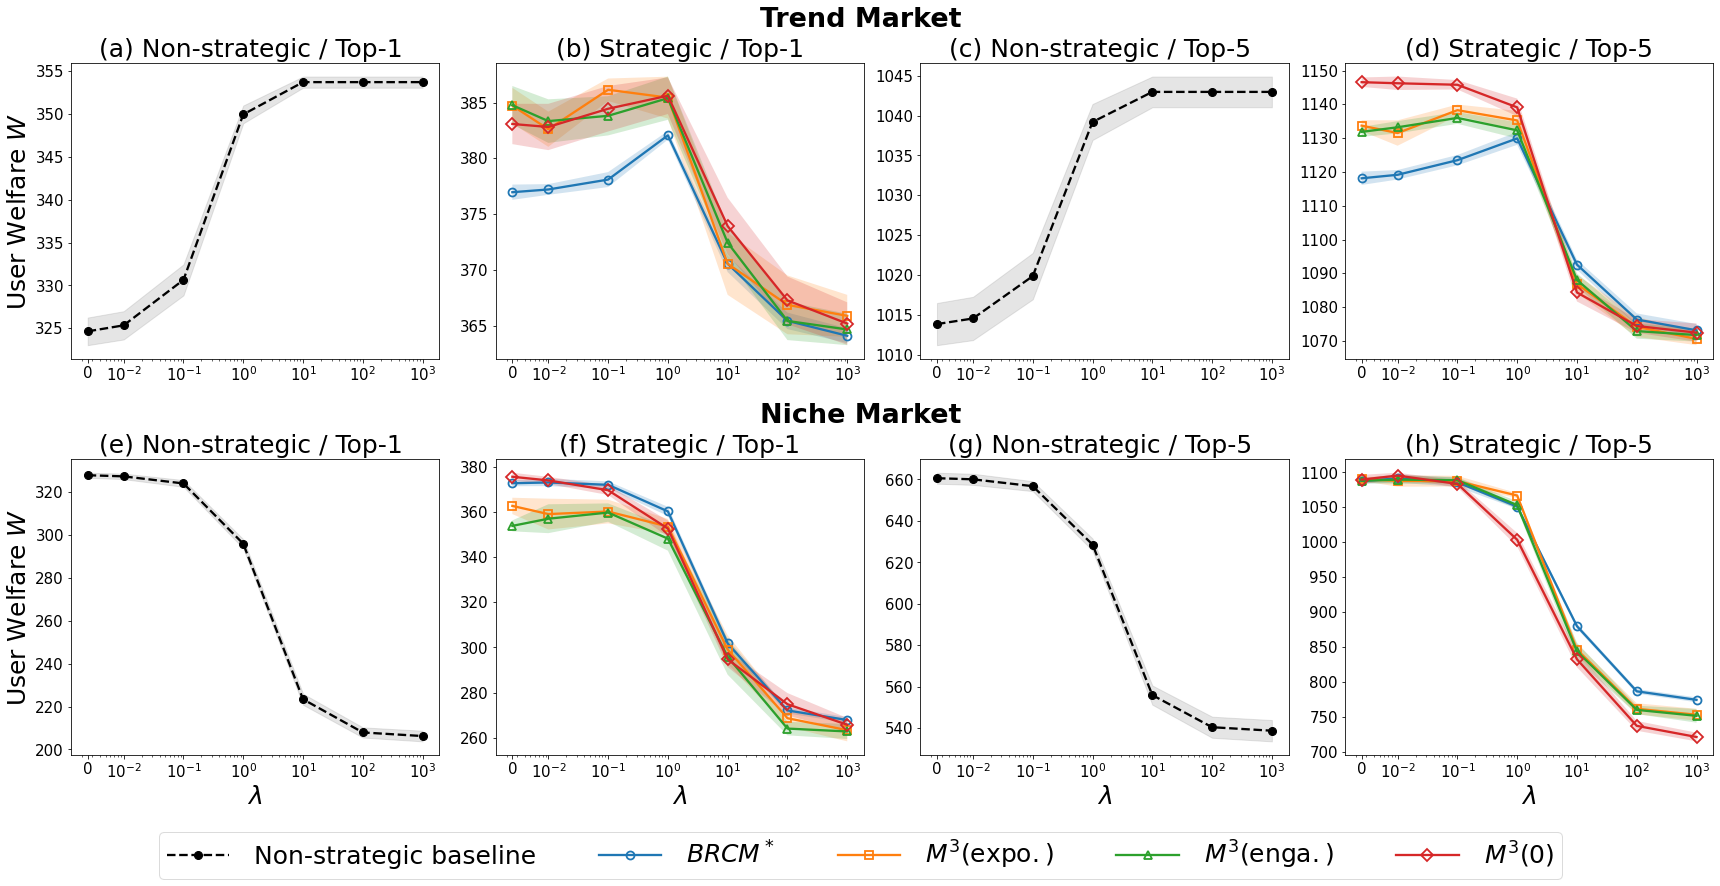

Combined grid chart saved to: /root/results_B-V_tradeoffs/['BRCM_star', 'M3_expo', 'M3_enga', 'M3_0']/uni-TvN9-pure_m=400_n=10_σ=0.5_d=10_top-1_07-17-171516/synthetic_Welfare_all.pdf


In [9]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import re
import string

save_dirs = [save_dir1, save_dir2, save_dir3, save_dir4]
subplot_labels = list(string.ascii_lowercase)
legend_handles = []
legend_labels = []
collected_labels = set()

fontsize = 25

fig, axes = plt.subplots(2, 4, figsize=(24, 10))
axes = axes.flatten()
plot_idx = 0

for save_dir_idx, save_dir in enumerate(save_dirs):
    welfare_data = {}
    
    config_file = os.path.join(save_dirs[save_dir_idx], "config.json")
    with open(config_file, "r", encoding="utf-8") as f:
        cfg = json.load(f)
        lambdas = eval(cfg['lambdas'])
        data_source = cfg['data_source']

    # Load static
    file_path = os.path.join(save_dir, "data", "static.pkl")
    with open(file_path, "rb") as f:
        data = pickle.load(f)
        welfare_data["static"] = data['welfare_mat_static']

    # Load dynamic mechanisms
    for mechan in mechanisms:
        file_path = os.path.join(save_dir, "data", f"{mechan}.pkl")
        with open(file_path, "rb") as f:
            data = pickle.load(f)
            welfare_data[mechan] = data['welfare_mat']

    total_group = welfare_data[mechanisms[0]].shape[0]
    L1_epochs = welfare_data[mechanisms[0]].shape[1]
    final_epoch = L1_epochs

    # --- Static Plot ---
    ax = axes[plot_idx]
    plot_idx += 1
    
    # for better visualization at lambda=0 
    lambdas_safe = lambdas.copy()
    if lambdas[-1] / lambdas[1] > 50:
        zero_indices = np.where((lambdas_safe[:-1] == 0))[0]
        lambdas_safe[zero_indices] = lambdas_safe[zero_indices + 1] / 4
        step = max(1, total_group // 10)
        xtick_positions = lambdas_safe[::step]
        xtick_labels = [
            "0" if lambdas[i] == 0 else rf"$10^{{{int(np.log10(lambdas[i]))}}}$"
            for i in range(len(xtick_positions))
        ]
        ax.set_xscale('log')
    else:
        xtick_positions = lambdas
        xtick_labels = [f"{x:.1f}" for x in lambdas]



    data = welfare_data["static"]
    avg_welfare = np.mean(data, axis=1)
    std_welfare = np.std(data, axis=1)

    sta_label = "Non-strategic baseline"
    sta_line, = ax.plot(
        lambdas_safe,
        avg_welfare,
        color='black',
        marker='o',
        markersize=8,
        linewidth=2.3,
        linestyle='--',
        label=sta_label
    )
    if sta_label not in collected_labels:
        legend_handles.append(sta_line)
        legend_labels.append(sta_label)
        collected_labels.add(sta_label)

    ax.fill_between(
        lambdas_safe,
        avg_welfare - width * std_welfare,
        avg_welfare + width * std_welfare,
        color='gray',
        alpha=0.2
    )
    K = 1 if save_dir_idx + 1 in [1, 3] else 5
    ax.set_title(f"({subplot_labels[plot_idx - 1]}) Non-strategic / Top-{K} ", fontsize=fontsize)
    # ax.set_xlabel(r"$\lambda$", fontsize=16)
    if save_dir_idx + 1 in [1, 3]:
        ax.set_ylabel(r"User Welfare $W$", fontsize=fontsize)
    if save_dir_idx + 1 in [3, 4]:
        ax.set_xlabel(r"$\lambda$", fontsize=fontsize)
    ax.tick_params(axis='both', labelsize=fontsize-10)
    # ax.set_xscale('log')
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(xtick_labels, fontsize=fontsize-10)

    # --- Final Epoch Plot ---
    ax = axes[plot_idx]
    plot_idx += 1
    if lambdas[-1] / lambdas[1] > 50:
        zero_indices = np.where((lambdas_safe[:-1] == 0))[0]
        lambdas_safe[zero_indices] = lambdas_safe[zero_indices + 1] / 4
        step = max(1, total_group // 10)
        xtick_positions = lambdas_safe[::step]
        xtick_labels = [
            "0" if lambdas[i] == 0 else rf"$10^{{{int(np.log10(lambdas[i]))}}}$"
            for i in range(len(xtick_positions))
        ]
        ax.set_xscale('log')
    else:
        xtick_positions = lambdas
        xtick_labels = [f"{x:.1f}" for x in lambdas]

    for mechan in mechanisms:
        if mechan == 'BRCM_1':
            continue
        data = welfare_data[mechan]
        if final_epoch > data.shape[1]:
            continue
        avg_welfare = np.mean(data[:, final_epoch - 1, :], axis=1)
        std_welfare = np.std(data[:, final_epoch - 1, :], axis=1)

        label_map = {
            'BRCM_star': r'$BRCM^*$',
            'M3_expo': r'$M^3\mathrm{(expo.)}$',
            'M3_enga': r'$M^3\mathrm{(enga.)}$',
            'M3_0': r'$M^3(0)$'
        }
        label = label_map.get(mechan, mechan)
        style = style_map[mechan]

        line, = ax.plot(
            lambdas_safe,
            avg_welfare,
            label=label,
            color=style["color"],
            marker=style["marker"],
            markersize=8,
            markerfacecolor='none',
            markeredgewidth=1.8,
            linewidth=2.3
        )
        if label not in collected_labels:
            legend_handles.append(line)
            legend_labels.append(label)
            collected_labels.add(label)

        ax.fill_between(
            lambdas_safe,
            avg_welfare - width * std_welfare,
            avg_welfare + width * std_welfare,
            alpha=0.2
        )

    ax.set_title(f"({subplot_labels[plot_idx - 1]}) Strategic / Top-{K}", fontsize=fontsize)
    if save_dir_idx + 1 in [3, 4]:
        ax.set_xlabel(r"$\lambda$", fontsize=fontsize)
    ax.tick_params(axis='both', labelsize=fontsize-10)
    # ax.set_xscale('log')
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(xtick_labels, fontsize=fontsize-10)

    # truncated y axis
    if final_epoch == 1500:
        if K == 1:
            if data_source == 'ml-100k':
                ax.set_ylim(bottom=1930, top=1980)
            if data_source == 'amz':
                ax.set_ylim(bottom=10550, top=10770)
        elif K == 5:
            if data_source == 'ml-100k':
                ax.set_ylim(bottom=5620, top=5780)
            if data_source == 'amz':
                ax.set_ylim(bottom=30600, top=31150)

                
fig.text(0.5, 1.01, f"{row_titles[0]}", ha='center', va='center', fontsize=fontsize+2, weight='bold')
fig.text(0.5, 0.46, f"{row_titles[1]}", ha='center', va='center', fontsize=fontsize+2, weight='bold')

# legend
fig.legend(
    handles=legend_handles,
    labels=legend_labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.2),
    ncol=len(legend_labels),
    fontsize=fontsize,
    frameon=True,
    fancybox=True,
    edgecolor='lightgray',
    borderpad=0.3,
    handlelength=2.5,
    columnspacing=2.5,
    handletextpad=1
)


plt.tight_layout(rect=[0, -0.1, 1, 1], h_pad=5.0)
plt.show()
typ = 'real' if data_source in ['ml-100k', 'amz'] else 'synthetic'
filename = re.sub(r'[<>:"/\\|?*]', '', f"{typ}_Welfare_all").replace(" ", "_") + ".pdf"
save_path = os.path.join(save_dirs[0], filename)
fig.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.close()
print(f"Combined grid chart saved to: {save_path}")
